# Fashion MINST classifier
- Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
- This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels , and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

__Labels__

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot
<p align="center"><img src="assets/dataset-cover.png" height="250"></p>

download dataset csv files from [Link](https://www.kaggle.com/datasets/zalando-research/fashionmnist/download)
- fashion-mnist_train.csv
- fashion-mnist_test.csv


# Data Loading

## train and test data

In [1]:
import numpy as np

from src import dataset,visualization,model_training
from torch.utils.data import DataLoader
from src.model import  FashionMinstModel
import torch

In [2]:
train_data=dataset.FashionDataset("../dataset/fashion-mnist_train.csv",normalized=True)
test_data=dataset.FashionDataset("../dataset/fashion-mnist_test.csv",normalized=True)

sample_data=dataset.FashionDataset("../dataset/fashion-mnist_test.csv",normalized=False,n_rows=5)

train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64)

## inference data

In [3]:
inference_data=dataset.FashionDataset("../dataset/fashion-mnist_test.csv",normalized=False)

In [4]:
inference_loader=DataLoader(inference_data,batch_size=1,shuffle=True)
classes_name=dataset.FashionDataset.meta_data['classes']

# Data Exploration

In [5]:
print(f"train data size={len(train_data)}")
print(f"test data size={len(test_data)}")

train data size=60000
test data size=10000


In [6]:
for item,data in dataset.FashionDataset.meta_data.items():
    print(item,':',data)

img_vector_size : 784
img_dim : (28, 28)
classes : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


class index: 0 class Name: T-shirt/top


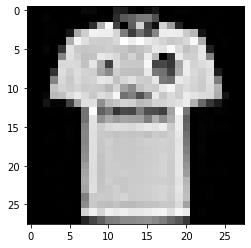

class index: 1 class Name: Trouser


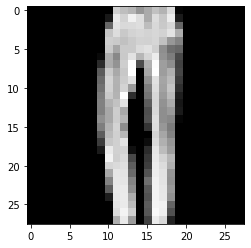

class index: 2 class Name: Pullover


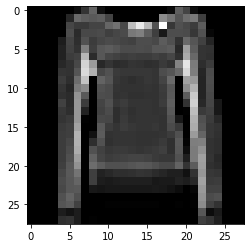

class index: 2 class Name: Pullover


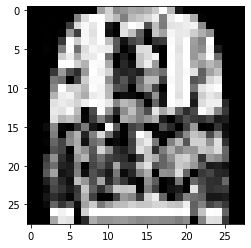

class index: 3 class Name: Dress


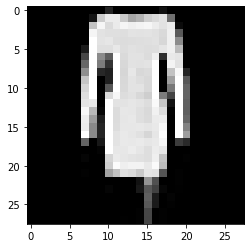

In [12]:
for img_vector,label in sample_data:
    print("class index:",label.item(),"class Name:",dataset.FashionDataset.meta_data["classes"][label])
    visualization.show_vector_img(img_vector,(28,28))



# Create instance from FashionMinstModel

In [13]:
fashion_minset_model=FashionMinstModel()


# Inference before training
- load random 15 images from inference  data without normalization from testing data to view the image and normalize it before prediction
- test 10 samples before and after training



In [14]:
random_inference_samples=[]
iterator=iter(inference_loader)
for i in range(15):
    random_inference_samples.append(next(iterator))


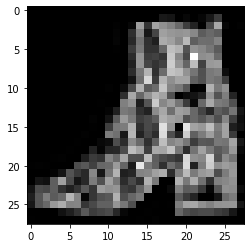

predicted label:Sneaker  actual label:Ankle boot 



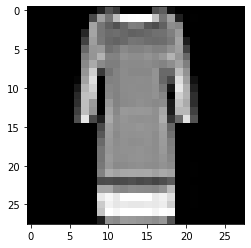

predicted label:Dress  actual label:Dress 



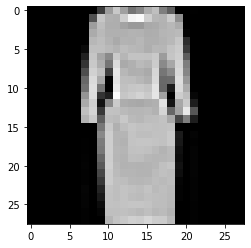

predicted label:Sneaker  actual label:Dress 



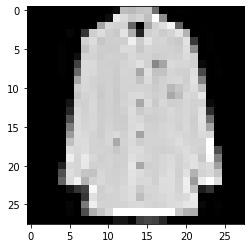

predicted label:Sneaker  actual label:Coat 



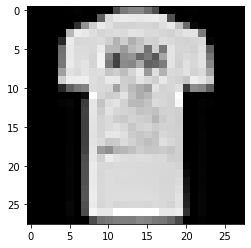

predicted label:Sneaker  actual label:T-shirt/top 



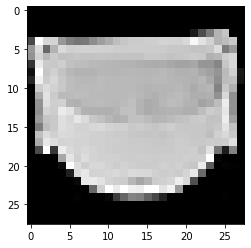

predicted label:Dress  actual label:Bag 



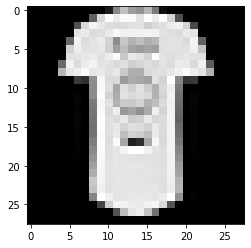

predicted label:Sneaker  actual label:T-shirt/top 



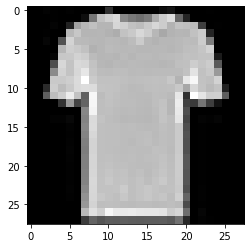

predicted label:Sneaker  actual label:T-shirt/top 



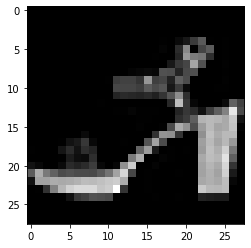

predicted label:Sneaker  actual label:Sandal 



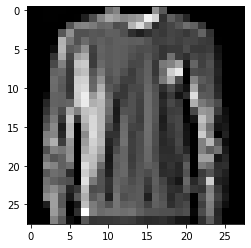

predicted label:Sneaker  actual label:Pullover 



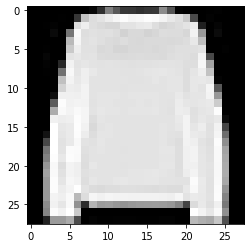

predicted label:Sneaker  actual label:Pullover 



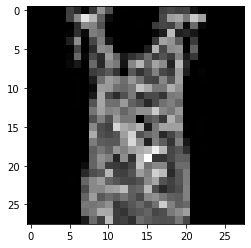

predicted label:Sneaker  actual label:Shirt 



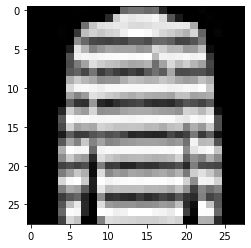

predicted label:Sneaker  actual label:Pullover 



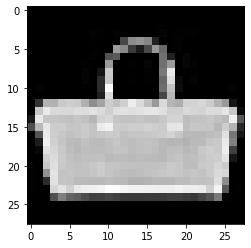

predicted label:Sneaker  actual label:Bag 



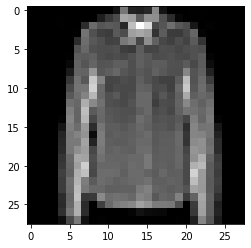

predicted label:Sneaker  actual label:Shirt 



In [15]:
for data,label in random_inference_samples:

    visualization.show_vector_img(data[0],img_dim=(28,28))
    data=dataset.normalize_tensor(data)
    predicted_class=fashion_minset_model.predict(data) #returns list of top classes of the given batches
    print(f"predicted label:{classes_name[predicted_class[0]]}  actual label:{classes_name[label]} \n")



## Training
- each epoch train and test accuracy  and losses are calculated, if a new high score in test loss and training is achieved the model weights are saved although if the training loss only got a high score  the model weights aren't saved to avoid overfitting


In [16]:
train_losses,test_losses,train_accuracy,test_accuracy=model_training.train(fashion_minset_model,epochs=30,learning_rate=0.001,train_loader=train_loader,test_loader=test_loader)


model testLoss and accuracy before training 
Test Loss:2.302659 Test Accuracy:13.15%


Epoch: 1/30..  Training Loss: 0.46943856..  Test Loss: 0.35203201..  Train Accuracy: 82.82667% Test Accuracy: 87.02000%
new min test and train loss  achieved --> model weights saved in '../model_weights/train_weights/23_04 02_28 train_82 test_87.pt'


Epoch: 2/30..  Training Loss: 0.34218351..  Test Loss: 0.33927348..  Train Accuracy: 87.35333% Test Accuracy: 87.52000%
new min test and train loss  achieved --> model weights saved in '../model_weights/train_weights/23_04 02_28 train_87 test_87.pt'


Epoch: 3/30..  Training Loss: 0.30520222..  Test Loss: 0.30740286..  Train Accuracy: 88.70167% Test Accuracy: 88.40000%
new min test and train loss  achieved --> model weights saved in '../model_weights/train_weights/23_04 02_28 train_88 test_88.pt'
!!!Warning overfitting!!!


Epoch: 4/30..  Training Loss: 0.27921339..  Test Loss: 0.34217567..  Train Accuracy: 89.57333% Test Accuracy: 87.59000%
!!!Warning

# Train visualization

## train and test loss

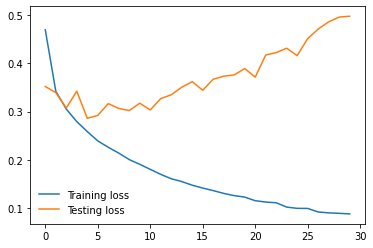

In [17]:
visualization.plot_train_validation((train_losses,"Training loss"),(test_losses,"Testing loss"))

## train and test accuracy

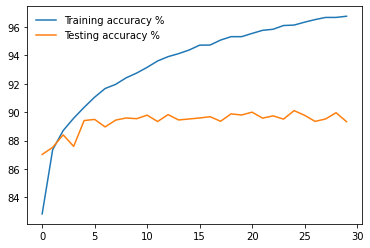

In [18]:
visualization.plot_train_validation((train_accuracy,"Training accuracy %"),(test_accuracy,"Testing accuracy % "))

## Loading final weights
- loading final weights at minimum test and training  loss at epoch 5
    - Training Loss: 0.25864401..  Test Loss: 0.28615684..  Train Accuracy: 90.34167% Test Accuracy: 89.41000%

In [19]:
state_dict=torch.load("../model_weights/train_weights/23_04 01_11 train_88 test_88.pt")
torch.save(state_dict,"../model_weights/final_weights/fashion_MINST_weights.pt")
fashion_minset_model.load_state_dict(state_dict)


<All keys matched successfully>

# Inference after training



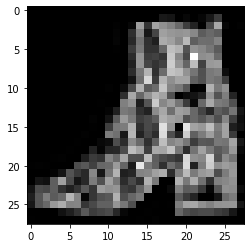

predicted label:Ankle boot  actual label:Ankle boot 



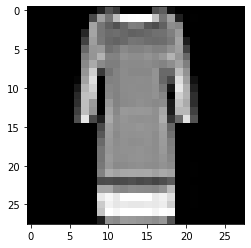

predicted label:Dress  actual label:Dress 



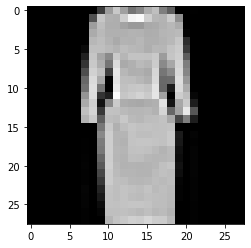

predicted label:Dress  actual label:Dress 



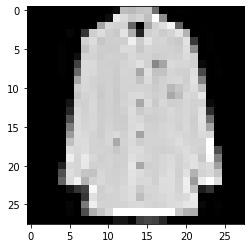

predicted label:Coat  actual label:Coat 



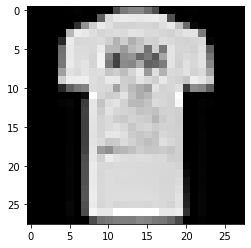

predicted label:T-shirt/top  actual label:T-shirt/top 



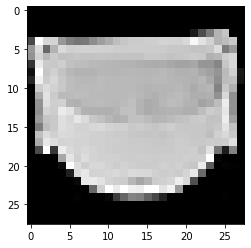

predicted label:Bag  actual label:Bag 



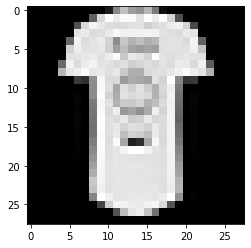

predicted label:T-shirt/top  actual label:T-shirt/top 



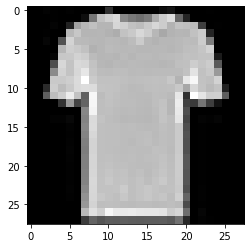

predicted label:T-shirt/top  actual label:T-shirt/top 



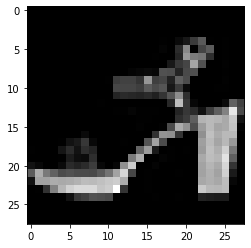

predicted label:Sandal  actual label:Sandal 



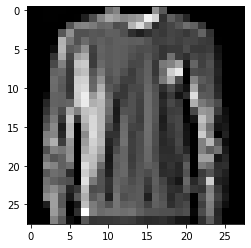

predicted label:Pullover  actual label:Pullover 



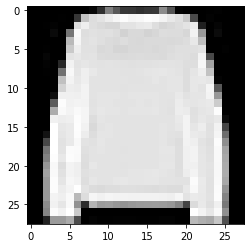

predicted label:Shirt  actual label:Pullover 



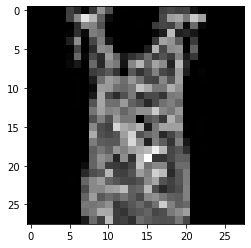

predicted label:Dress  actual label:Shirt 



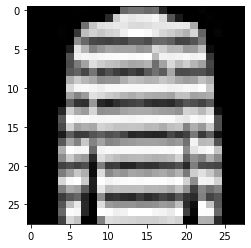

predicted label:Shirt  actual label:Pullover 



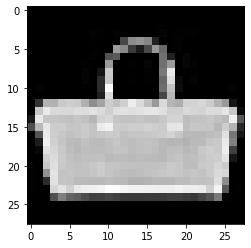

predicted label:Bag  actual label:Bag 



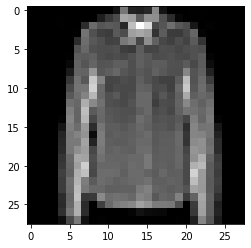

predicted label:Shirt  actual label:Shirt 



In [20]:
for data,label in random_inference_samples:

    visualization.show_vector_img(data[0],img_dim=(28,28))
    data=dataset.normalize_tensor(data)
    predicted_class=fashion_minset_model.predict(data) #returns list of top classes of the given batches
    print(f"predicted label:{classes_name[predicted_class[0]]}  actual label:{classes_name[label]} \n")